In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.dates import DateFormatter
import datetime as dt

In [2]:
September = pd.read_excel(r'[YOUR SAVED LOCATION HERE]\September 2023 YHM Data Report.xlsx')

In [3]:
#Sum, Averages and Highs/Lows for Temperature & Precipitation

Total = September['Total Precip'].sum()
print(f"Precip Sum = {Total}")

High_Avg = September['Max Temp'].mean().round(2)
print(f"Average High = {High_Avg}")

Highest_Temp = September['Max Temp'].max()
print(f"Highest High = {Highest_Temp}")

Low_Avg = September['Min Temp'].mean().round(2)
print(f"Average Low = {Low_Avg}")

Low_Low = September['Min Temp'].min()
print(f"Lowest Low = {Low_Low}")

Highest_High = September['Max Temp'].max()
print(f"High of Month = {Highest_High}")

Lowest_Low = September['Min Temp'].min()
print(f"Low of Month = {Lowest_Low}")

Highest_Precip = September['Total Precip'].max()
print(f"Highest Precip Day = {Highest_Precip}")

Precip Sum = 25.9
Average High = 22.33
Highest High = 31.0
Average Low = 12.15
Lowest Low = 6.3
High of Month = 31.0
Low of Month = 6.3
Highest Precip Day = 15.9


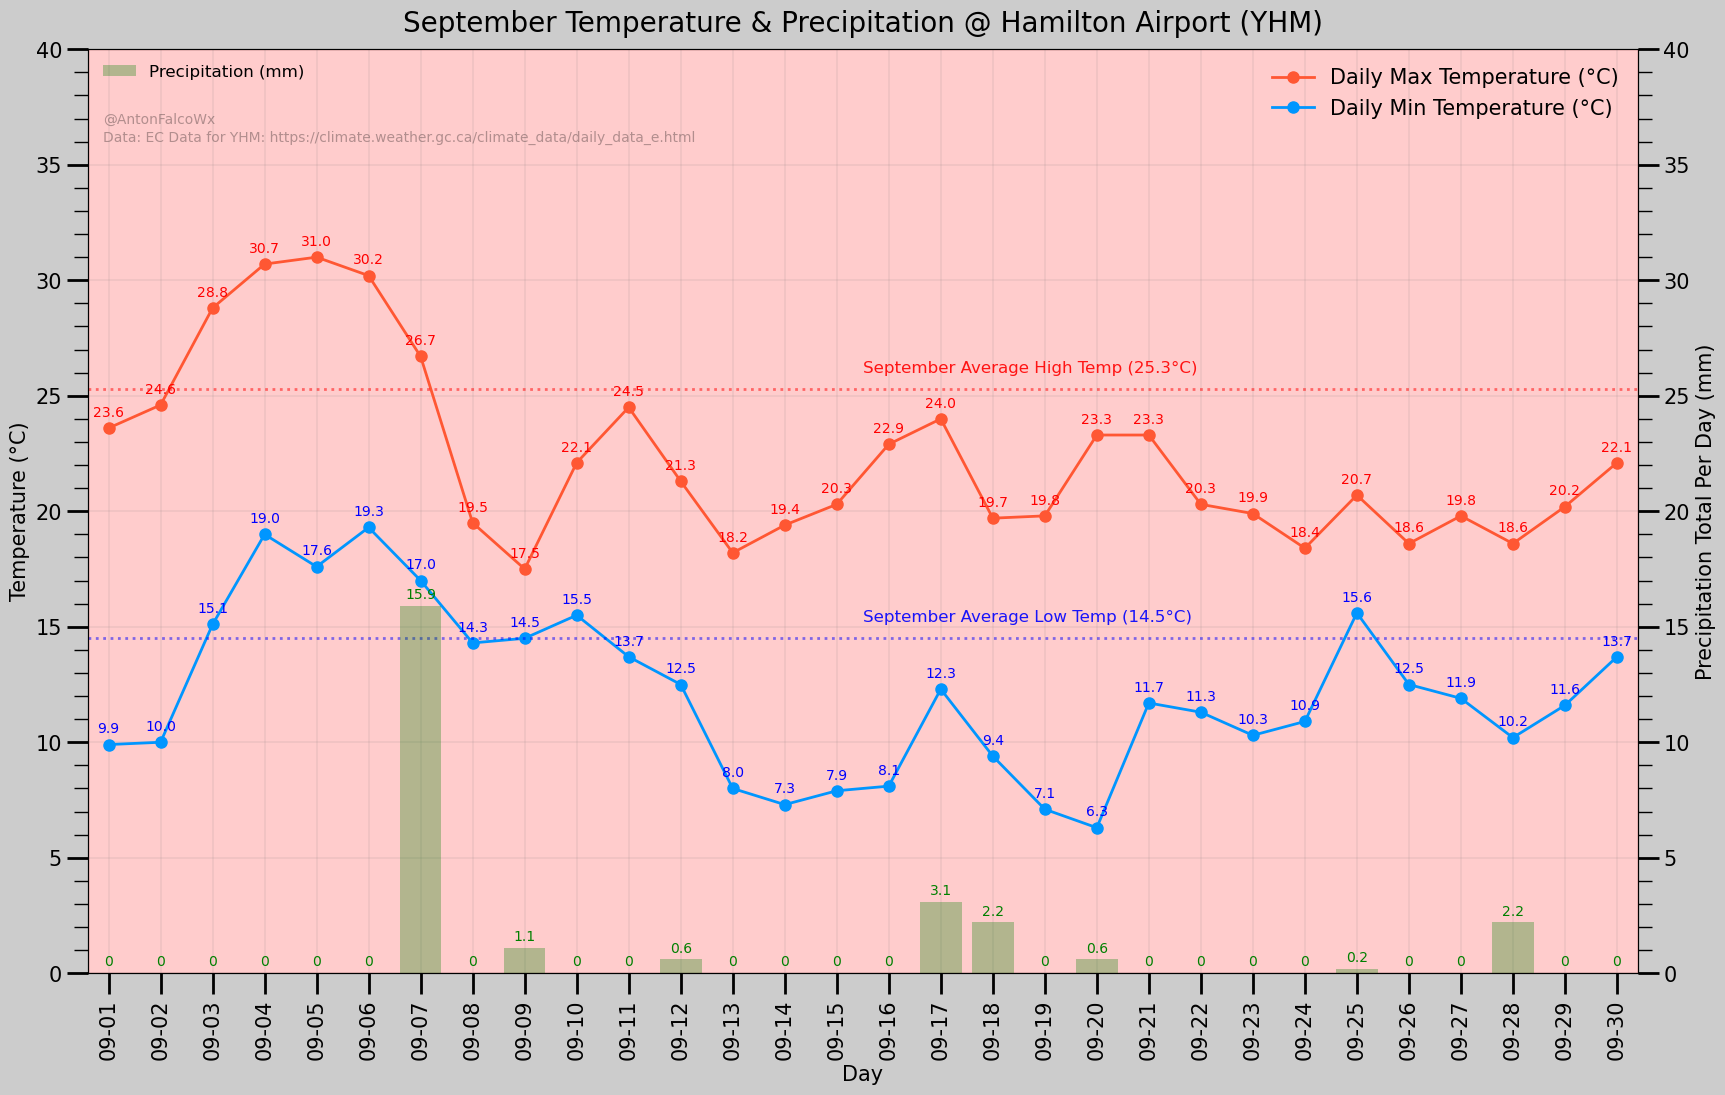

In [4]:
fig, ax = plt.subplots(figsize=(20,12)) 
ax2 = ax.twinx()
#ax.set_facecolor('#DEDEDE')
fig.patch.set_facecolor('#ccc')

#Line Graph and Annotations
Month = (September['Day'])
Max = (September['Max Temp'])
Min = (September['Min Temp'])

#Temperature plots and labels
ax.plot(September['Day'], September['Max Temp'], '-o', ms=8, color='#FF5733', linewidth=2.0)
for i, txt in enumerate(Max):
    ax.annotate(txt, (Month[i], Max[i]+0.5), ha='center', c='red', fontsize=10, fontweight='bold')

ax.plot(September['Day'], September['Min Temp'], '-o', ms=8, color='#0096FF', linewidth=2.0)
for i, txt in enumerate(Min):
    ax.annotate(txt, (Month[i], Min[i]+0.5), ha='center', c='blue', fontsize=10, fontweight='bold')

Precip = ax2.bar(September['Day'], September['Total Precip'], alpha=0.3, color='g')
plt.bar_label(Precip, padding=3, fontsize=10, fontweight='bold', color='g')


#Labels
ax.grid(which='major', color='gray', linewidth=0.15)
ax.set_title('September Temperature & Precipitation @ Hamilton Airport (YHM)', y=1.01, fontweight='bold', fontsize=20)
ax.set_xlabel('Day',fontweight='bold', fontsize=15)
ax.set_ylabel('Temperature (°C)',fontweight='bold', fontsize=15)
ax2.set_ylabel('Precipitation Total Per Day (mm)', fontweight='bold', fontsize=15)

#Temperature & Day X/Y-axis
ax.margins(x=0)
ax.margins(y=0)
ax.set_ylim([0, 40])
ax2.set_ylim([0, 40])

#Legends 
ax.legend(["Daily Max Temperature (°C)", "Daily Min Temperature (°C)", "Average Temperature (°C)"],fontsize=15, loc=1, frameon=False)
ax2.legend(["Precipitation (mm)"], loc=2, fontsize=12, frameon=False)

#Changing the x and y axis intervals (ticks)
ax.xaxis.set_minor_locator(MultipleLocator())
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator())
ax.yaxis.set_major_locator(MultipleLocator(5))
ax2.yaxis.set_minor_locator(MultipleLocator())
ax2.yaxis.set_major_locator(MultipleLocator(5))

#Longer Ticks
ax.tick_params('both', length=15, width=2, which='major', labelsize=15)
ax.tick_params('both', length=10, width=1, which='minor', labelsize=15)
ax2.tick_params('both', length=15, width=2, which='major', labelsize=15)
ax2.tick_params('both', length=10, width=1, which='minor', labelsize=15)
ax.tick_params(axis='x', rotation=90)

date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

#Adding name and two line labels
#plt.text(0.01, 0.92, '@AntonFalcoWx', fontsize = 10, transform=ax.transAxes, alpha=0.3)
plt.text(0.01, 0.90, 'Data: EC Data for YHM: https://climate.weather.gc.ca/climate_data/daily_data_e.html', fontsize = 10, transform=ax.transAxes, alpha=0.3)
plt.text(0.5, 0.65, 'September Average High Temp (25.3°C)',color='red', fontsize = 12, transform=ax.transAxes, alpha=0.9)
plt.text(0.5, 0.38, 'September Average Low Temp (14.5°C)',color='blue', fontsize = 12, transform=ax.transAxes, alpha=0.9)

#Average lines (Average Temperature and Average Precip)
ax.axhline(25.3,0,28,color='red',linewidth=2.0,linestyle='dotted',alpha=0.5)
ax.axhline(14.5,0,28,color='blue',linewidth=2.0,linestyle='dotted',alpha=0.5)
#ax.axhline(0,0,28,color='black',linewidth=1.0,linestyle='solid')


#Shaded background (Background Red)
ax.axhspan(40, 0, alpha=0.2, color='r')

#Vertical Shading (smoke)
#start_date = dt.datetime(2023, 7, 14)
#end_date = dt.datetime(2023, 7, 18)
#ax.axvspan(start_date, end_date, alpha=0.35, color='gray')


#plt.savefig('YHM_Normals vs September.jpg', dpi=300)
plt.show()
plt.close()

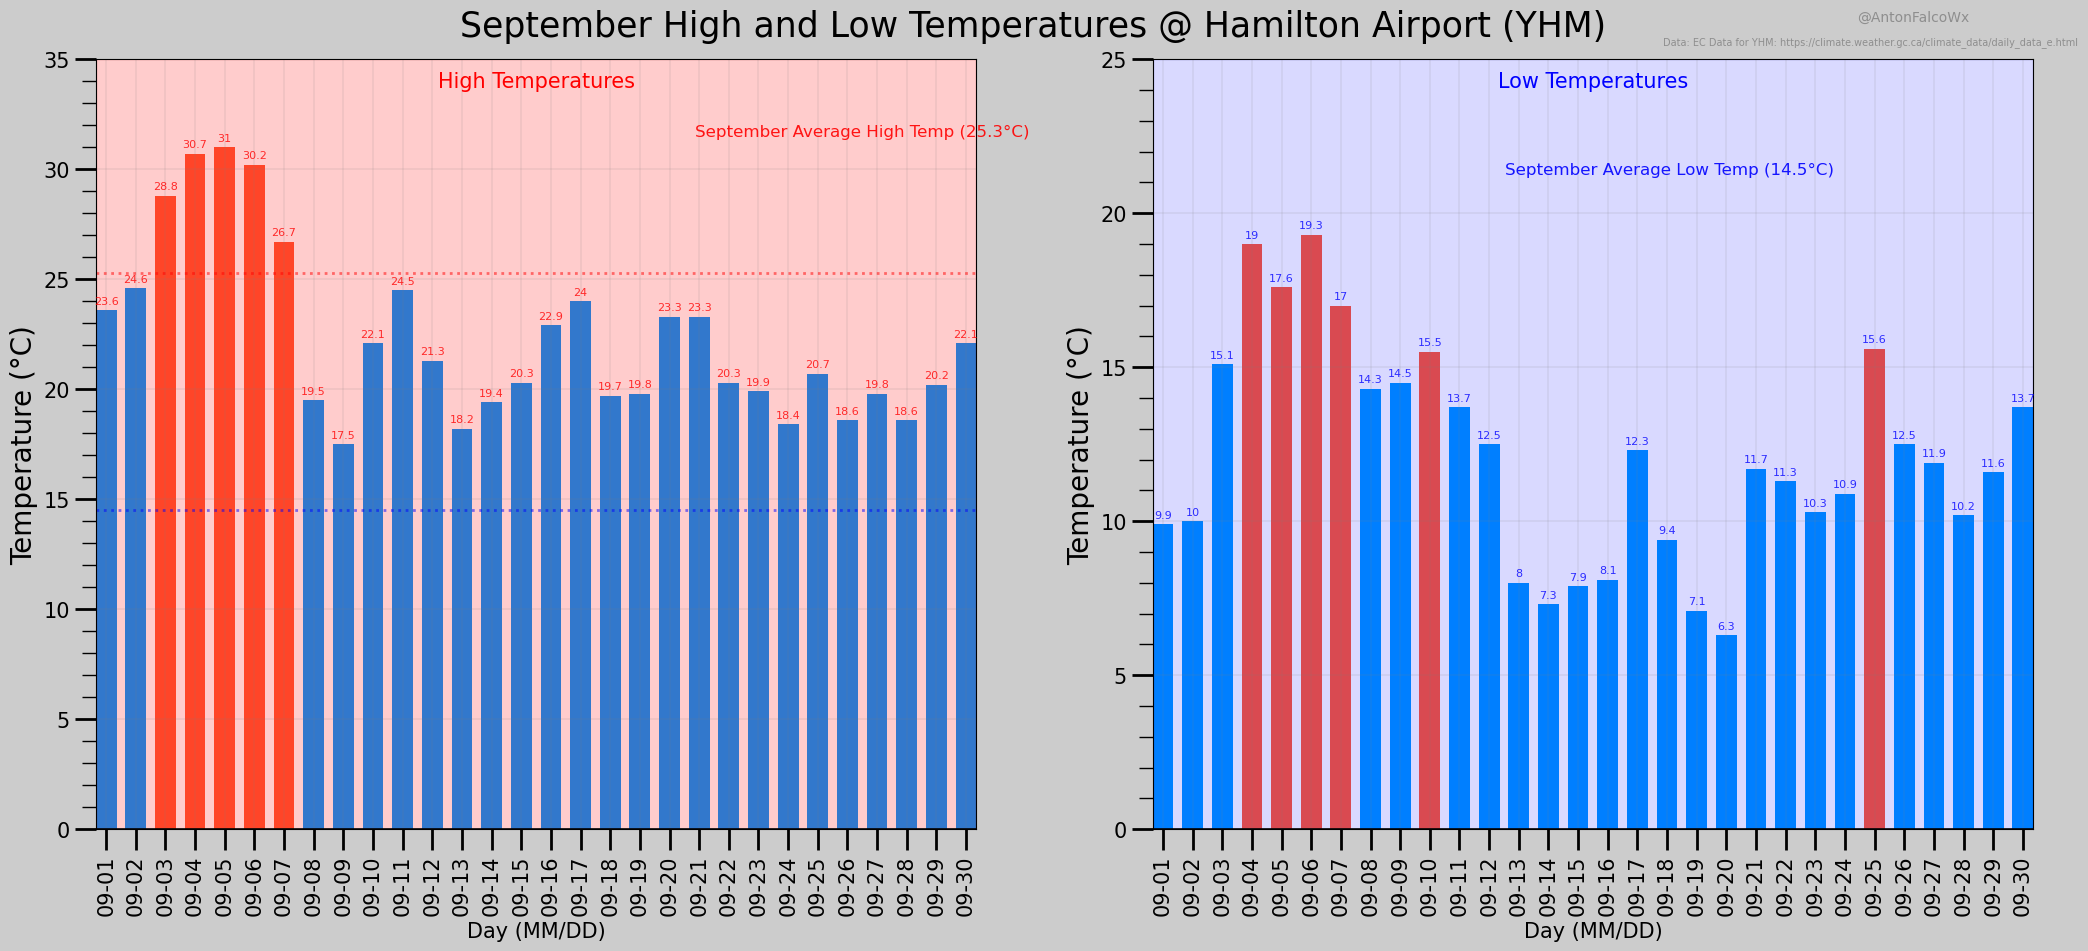

In [5]:
#Separated Highs and Lows
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(25,10))
fig.suptitle('September High and Low Temperatures @ Hamilton Airport (YHM)',  y=.93, fontweight='bold', fontsize=25)
#ax.set_facecolor('#DEDEDE')
#ax2.set_facecolor('#DEDEDE')
fig.patch.set_facecolor('#ccc')


#Bar Plots
Max_Temp = September['Max Temp']
Min_Temp = September['Min Temp']

#rects1 = ax.bar(x - width/2, df['Max Temp'], width, label='Max', color='#FF5733')
#plt.bar_label(rects1, padding=3, fontsize=12)

#Left Plot: Data and below average color change
colormap = np.where(September['Max Temp']< 26.5, '#0096FF','#FF5733')
Precip = ax.bar(height=September['Max Temp'], x=September['Day'], width=0.7, color=colormap)
ax.bar_label(Precip, padding=3, fontsize=8, fontweight='bold', color='red', alpha=0.8)

#Right Plot: Data and below average color change
colormap=np.where(September['Min Temp']> 15.2, '#FF5733','#0096FF')
Precip2 = ax2.bar(height=September['Min Temp'], x=September['Day'], width=0.7, color=colormap)
ax2.bar_label(Precip2, padding=3, fontsize=8, fontweight='bold', color='blue', alpha=0.8)



#Labels (left plot)
ax.grid(which='major', color='gray', linewidth=0.15)
ax.set_title('High Temperatures',fontweight='bold', fontsize=15, color='red', y=1.0, pad=-20)
ax.set_xlabel('Day (MM/DD)',fontweight='bold', fontsize=15)
ax.set_ylabel('Temperature (°C)',fontweight='bold', fontsize=20)


#Labels (right plot)
ax2.grid(which='major', color='gray', linewidth=0.15)
ax2.set_title('Low Temperatures', fontweight='bold', fontsize=15, color='blue', y=1.0, pad=-20)
ax2.set_xlabel('Day (MM/DD)', fontweight='bold', fontsize=15)
ax2.set_ylabel('Temperature (°C)', fontweight='bold', fontsize=20)


#Temperature & Day X/Y-axis
ax.margins(x=0)
ax.margins(y=0)
ax.set_ylim([0, 35])

ax2.margins(x=0)
ax2.margins(y=0)
ax2.set_ylim([0, 25])

#Legends 
#ax.legend(["Daily Max Temperature (°C)"],fontsize=15, frameon=False)
#ax2.legend(["Daily Min Temperature (°C)"],fontsize=15, frameon=False)


#Changing the x and y axis intervals (ticks)
ax.xaxis.set_minor_locator(MultipleLocator())
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator())
ax.yaxis.set_major_locator(MultipleLocator(5))

ax2.xaxis.set_minor_locator(MultipleLocator())
ax2.xaxis.set_major_locator(MultipleLocator(1))
ax2.yaxis.set_minor_locator(MultipleLocator())
ax2.yaxis.set_major_locator(MultipleLocator(5))


#Longer Ticks
ax.tick_params('both', length=15, width=2, which='major', labelsize=15)
ax.tick_params('both', length=10, width=1, which='minor', labelsize=15)
ax.tick_params(axis='x', rotation=90)

ax2.tick_params('both', length=15, width=2, which='major', labelsize=15)
ax2.tick_params('both', length=10, width=1, which='minor', labelsize=15)
ax2.tick_params(axis='x', rotation=90)


#Average lines (Average Temperature and Average Precip)
ax.axhline(25.3,0,28,color='red',linewidth=2.0,linestyle='dotted',alpha=0.5)
ax.axhline(14.5,0,28,color='blue',linewidth=2.0,linestyle='dotted',alpha=0.5)

#Adding name 
plt.text(2.0, 1.05, '@AntonFalcoWx', fontsize = 10, transform=ax.transAxes, alpha=0.3)
plt.text(1.78, 1.02, 'Data: EC Data for YHM: https://climate.weather.gc.ca/climate_data/daily_data_e.html', fontsize = 7, transform=ax.transAxes, alpha=0.3)

plt.text(0.68, 0.9, 'September Average High Temp (25.3°C)',color='red', fontsize = 12, transform=ax.transAxes, alpha=0.9)
plt.text(1.6, 0.85, 'September Average Low Temp (14.5°C)',color='blue', fontsize = 12, transform=ax.transAxes, alpha=0.9)
#plt.text(0.15, 0.85, 'Wildfire Smoke', color='black', fontsize=8, transform=ax.transAxes)
#plt.text(1.35, 0.85, 'Wildfire Smoke', color='black', fontsize=8, transform=ax.transAxes)



#Zero degree lines
#ax.axhline(-1.7,0,28,color='red',linewidth=2.0,linestyle='dotted',alpha=0.5)
ax.axhline(0,0,28,color='black',linewidth=2,linestyle='solid',alpha=0.9)
ax2.axhline(0,0,28,color='black',linewidth=2,linestyle='solid',alpha=0.9)


#Shaded background
ax.axhspan(35, 0, alpha=0.2, color='r')
ax2.axhspan(25, 0, alpha=0.15, color='b')

#Vertical Shading
#start_date = dt.datetime(2023, 6, 5)
#end_date = dt.datetime(2023, 6, 8)
#ax.axvspan(start_date, end_date, alpha=0.4, color='gray')
#ax2.axvspan(start_date, end_date, alpha=0.4, color='gray')


#Date formatter
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax2.xaxis.set_major_formatter(date_form)


#plt.savefig('YHM_Normals vs September Bar Graph (double).jpg', dpi=300)
plt.show()
plt.close()

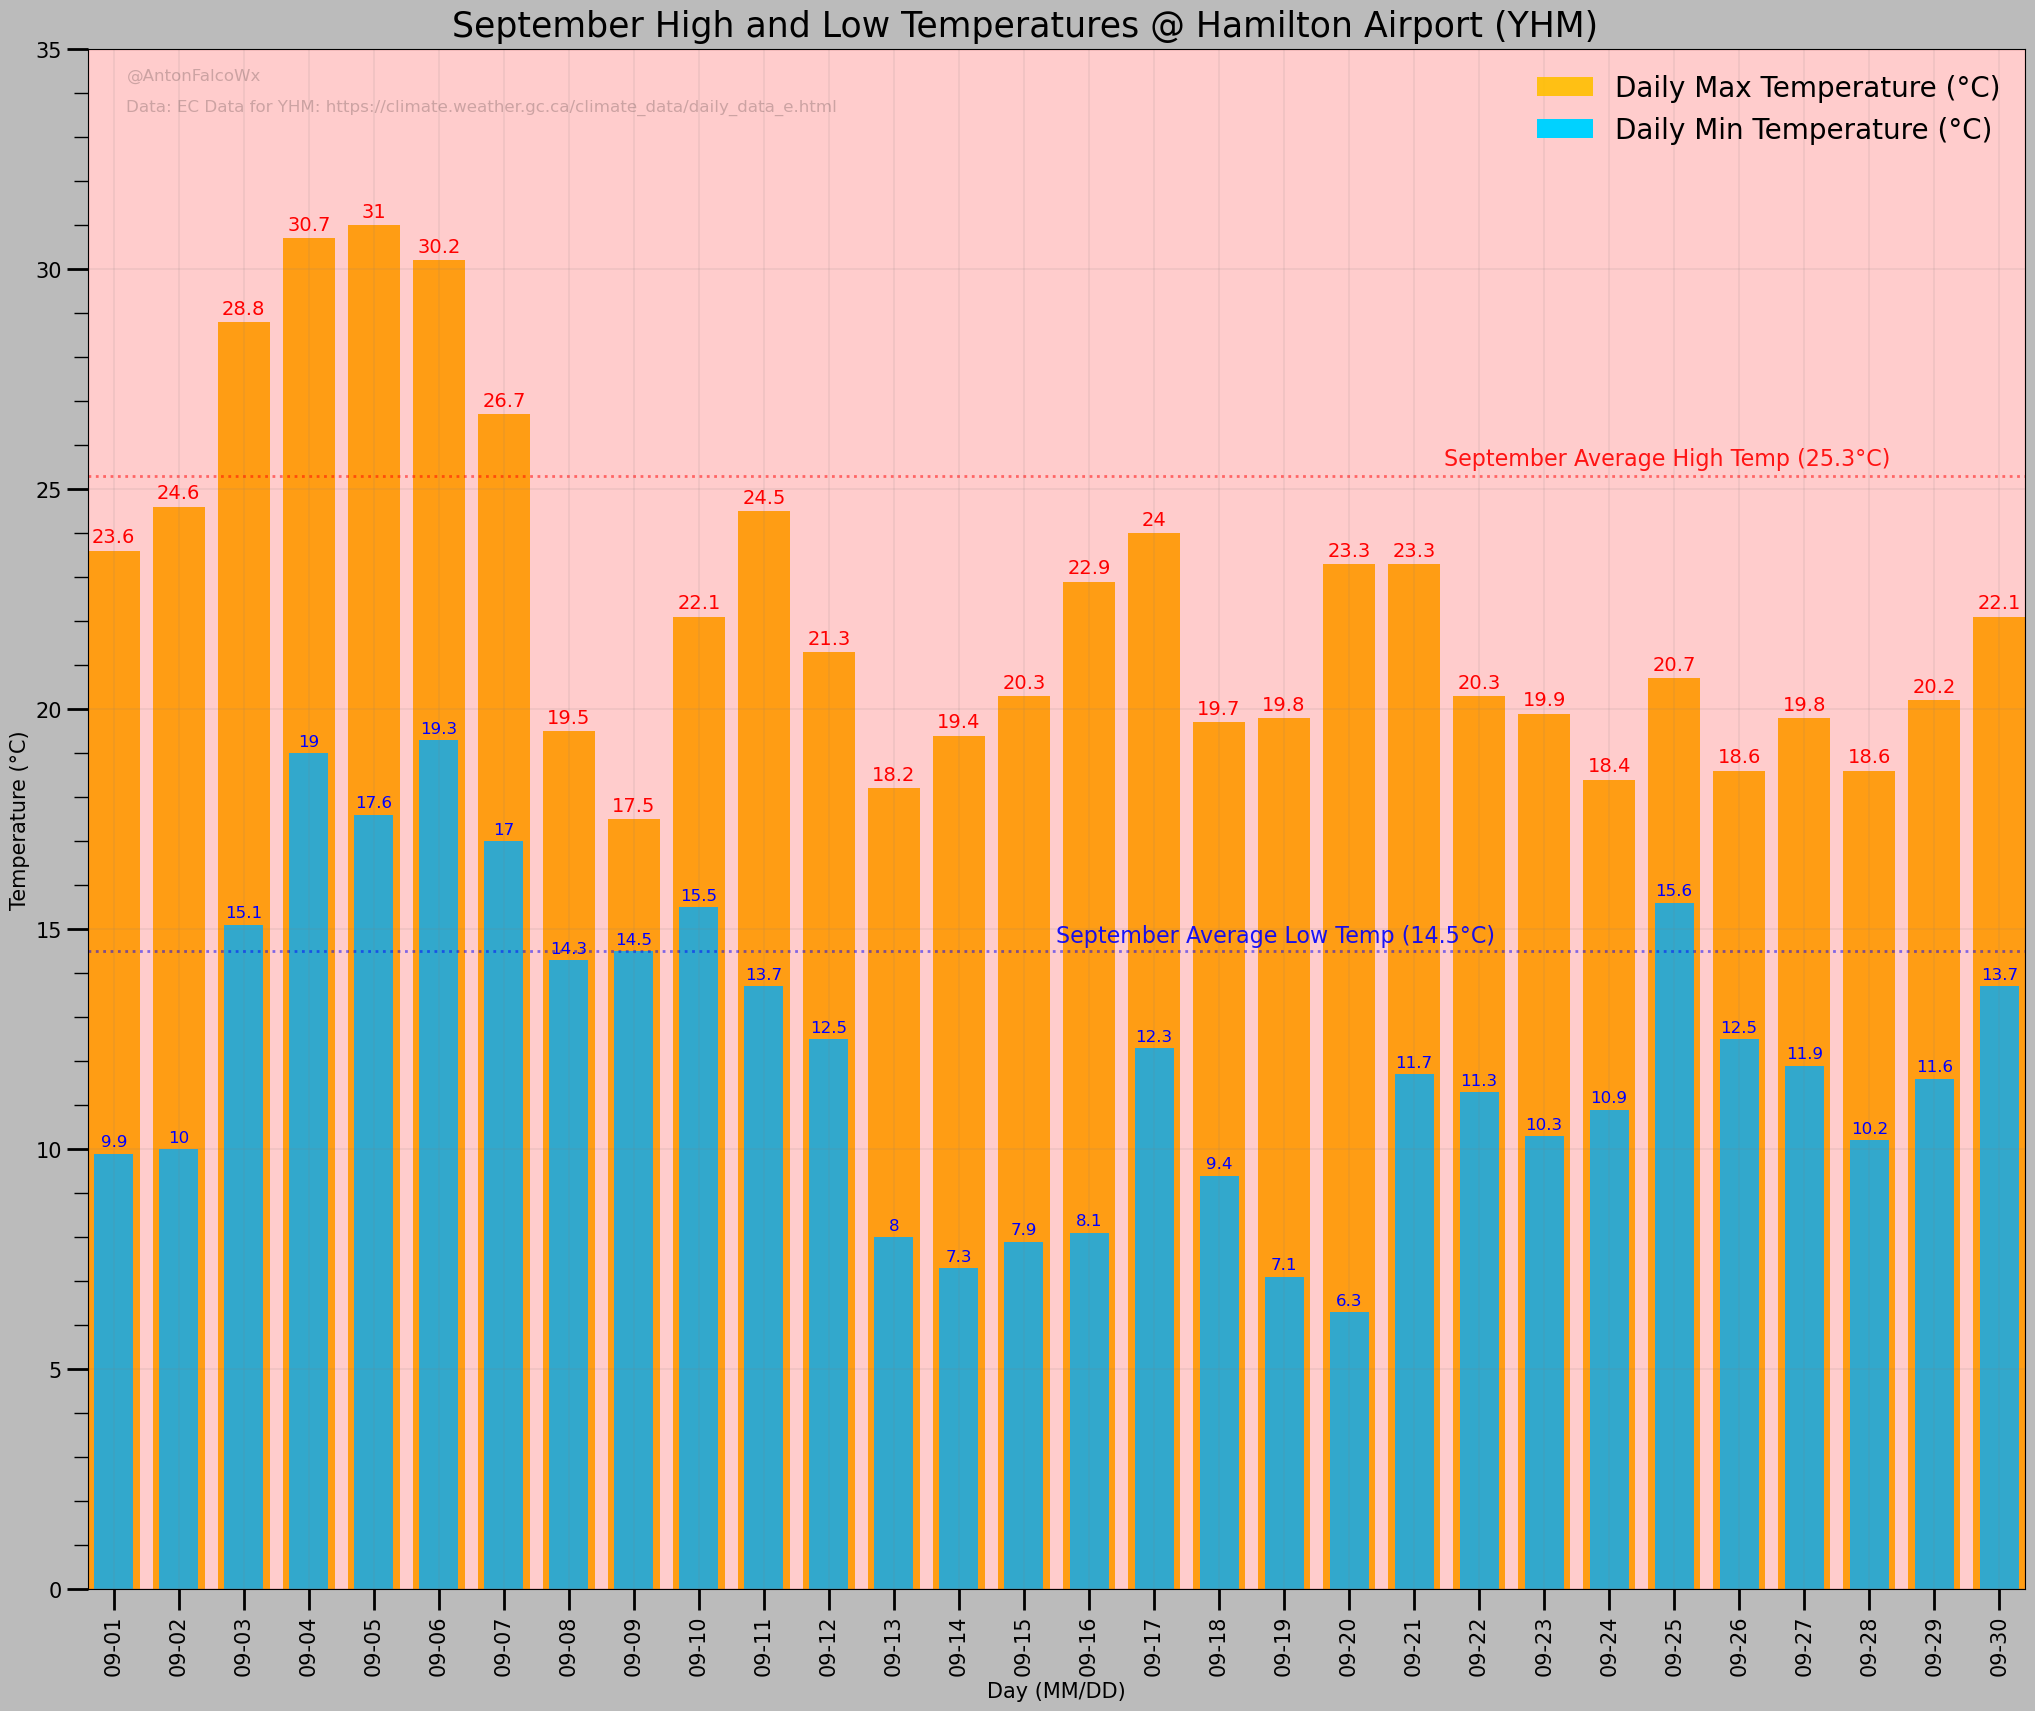

In [6]:
#Overlapping Highs and Lows
fig, ax = plt.subplots(figsize=(25,20))
fig.suptitle('September High and Low Temperatures @ Hamilton Airport (YHM)',  y=.9, fontweight='bold', fontsize=25)
#ax.set_facecolor('#DEDEDE')
fig.patch.set_facecolor('#bbb')


#Vertical layout
#fig, (ax, ax2) = plt.subplots(2, figsize=(18,15))
#ax.plot(1, 2)
#ax2.plot(1, -2)
#fig.suptitle('September High and Low Temperatures @ Hamilton Airport (YHM)', y=.90, fontweight='bold', fontsize=20) #y=.90 adjusts title
#ax.set_facecolor('#DEDEDE')
#ax2.set_facecolor('#DEDEDE')
#fig.patch.set_facecolor('#bbb')


#Bar Plot
Date = (September['Day'])
Max = (September['Max Temp'])
Min = (September['Min Temp'])

rects1 = ax.bar((September['Day']), September['Max Temp'], width=0.8, label='Max', color='#FFBF00', alpha=0.9)
rects2 = ax.bar((September['Day']), September['Min Temp'], width=0.6, label='Min', color='#00d2ff')

plt.bar_label(rects1, padding=3, fontsize=14, color='red', fontweight='bold')
plt.bar_label(rects2, padding=3, fontsize=12, color='blue', fontweight='bold')


#Legends 
ax.legend(["Daily Max Temperature (°C)", "Daily Min Temperature (°C)", "Average Temperature (°C)"],fontsize=20, loc=1, frameon=False)


#Labels (right plot)
ax.grid(which='major', color='gray', linewidth=0.15)
ax.set_xlabel('Day (MM/DD)',fontweight='bold', fontsize=15)
ax.set_ylabel('Temperature (°C)',fontweight='bold', fontsize=15)


#Temperature & Day X/Y-axis
ax.margins(x=0)
ax.margins(y=0)
ax.set_ylim([0, 35])


#Changing the x and y axis intervals (ticks)
ax.xaxis.set_minor_locator(MultipleLocator())
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator())
ax.yaxis.set_major_locator(MultipleLocator(5))


#Longer Ticks
ax.tick_params('both', length=15, width=2, which='major', labelsize=15)
ax.tick_params('both', length=10, width=1, which='minor', labelsize=15)
ax.tick_params(axis='x', rotation=90)


#Average lines (Average Temperature and Average Precip)
ax.axhline(25.3,0,28,color='red',linewidth=2.0,linestyle='dotted',alpha=0.5)
ax.axhline(14.5,0,28,color='blue',linewidth=2.0,linestyle='dotted',alpha=0.5)
#ax.axhline(0,0,28,color='black',linewidth=2.0,linestyle='solid')


#Adding name 
#plt.text(0.02, 0.98, '@AntonFalcoWx', fontsize = 12, transform=ax.transAxes, alpha=0.2)
#plt.text(0.02, 0.96, 'Data: EC Data for YHM: https://climate.weather.gc.ca/climate_data/daily_data_e.html', fontsize = 12, transform=ax.transAxes, alpha=0.2)

plt.text(0.7, 0.73, 'September Average High Temp (25.3°C)',color='red', fontsize = 16, transform=ax.transAxes, alpha=0.9)
plt.text(0.5, 0.42, 'September Average Low Temp (14.5°C)',color='blue', fontsize = 16, transform=ax.transAxes, alpha=0.9)
#plt.text(0.46, 0.93, 'Wildfire Smoke', color='black', fontsize=14, transform=ax.transAxes)


#Shaded background (red)
ax.axhspan(35, 0, alpha=0.2, color='r')

#Vertical Shading (smoke)
#start_date = dt.datetime(2023, 7, 14)
#end_date = dt.datetime(2023, 7, 18)
#ax.axvspan(start_date, end_date, alpha=0.5, color='gray')



#Date formatter
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)


#plt.savefig('YHM_Normals vs September Bar Graph (Overlap).jpg', dpi=300)
plt.show()
plt.close()